In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

In [18]:
batch_size = 64
epochs = 20

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/20
938/938 [==============================] - 51s 53ms/step - loss: 0.7204 - accuracy: 0.7380 - val_loss: 0.4389 - val_accuracy: 0.8358
Epoch 2/20
938/938 [==============================] - 49s 52ms/step - loss: 0.4498 - accuracy: 0.8412 - val_loss: 0.3632 - val_accuracy: 0.8712
Epoch 3/20
938/938 [==============================] - 48s 51ms/step - loss: 0.3863 - accuracy: 0.8649 - val_loss: 0.3246 - val_accuracy: 0.8803
Epoch 4/20
938/938 [==============================] - 47s 50ms/step - loss: 0.3509 - accuracy: 0.8783 - val_loss: 0.3184 - val_accuracy: 0.8867
Epoch 5/20
938/938 [==============================] - 48s 51ms/step - loss: 0.3206 - accuracy: 0.8872 - val_loss: 0.2855 - val_accuracy: 0.8982
Epoch 6/20
938/938 [==============================] - 47s 51ms/step - loss: 0.2971 - accuracy: 0.8958 - val_loss: 0.2914 - val_accuracy: 0.8986
Epoch 7/20
938/938 [==============================] - 48s 51ms/step - loss: 0.2774 - accuracy: 0.9028 - val_loss: 0.2754 - val_accuracy:

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 3s - loss: 0.2885 - accuracy: 0.9111 - 3s/epoch - 10ms/step

Точність на тестових даних: 0.9110999703407288


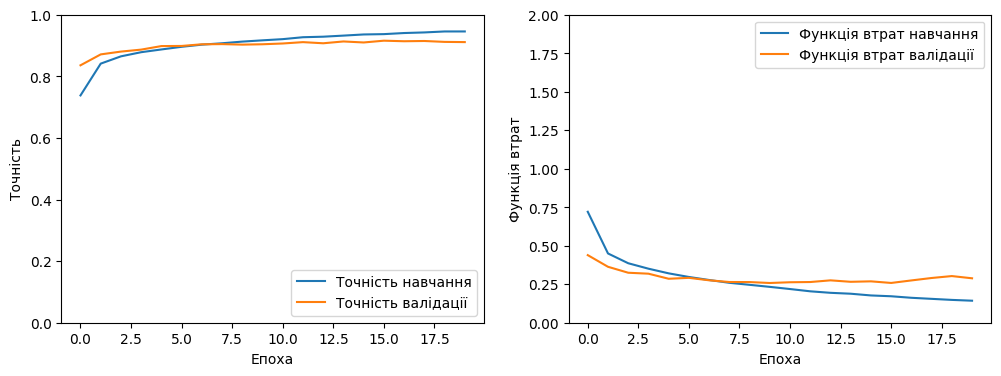

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність навчання')
plt.plot(history.history['val_accuracy'], label = 'Точність валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Функція втрат навчання')
plt.plot(history.history['val_loss'], label = 'Функція втрат валідації')
plt.xlabel('Епоха')
plt.ylabel('Функція втрат')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()

1/1 [==============================] - 0s 83ms/step


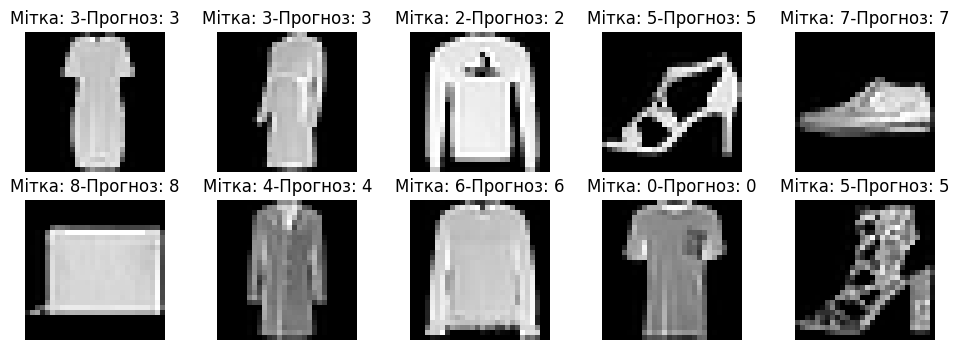

In [24]:
random_indices = np.random.randint(0, len(test_images), size=10)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]
predictions = model.predict(random_images)

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f'Мітка: {random_labels[i]}-Прогноз: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.show()

Можна зробити наступний висновок:

Нейронна мережа, яка створена з допомогою Keras, показала досить хорошу точність.

В кінці 20 епох навчання точність на навчальних даних (train accuracy) складає близько 94% - 94,5%

Точність на валідаційних даних (val_accuracy) досягла близько 91.1% на останній епохі.

Це означає, що модель добре класифікує зображення з датасету fashion_mnist в один з 10 можливих класів (наприклад, футболка, шорти, сукня тощо).
